## Homework #4

## Data

In this homework, we will train machine learning models, run experiments, tune hyperparameters, compare and combine models.
You are asked to solve a **binary classification** problem — to build an algorithm that predicts whether a person’s **average income exceeds $50K**.

Each observation represents a person for whom the following features are known:

* **age**
* **workclass**
* **fnlwgt**
* **education**
* **education-num**
* **marital-status**
* **occupation**
* **relationship**
* **race**
* **sex**
* **capital-gain**
* **capital-loss**
* **hours-per-week**

More detailed information about the features can be found [here](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names).
The target variable is stored in the column **`>50K, <=50K`**.


## Evaluation Metric

In this assignment, we will evaluate the performance of our models using the **AUC-ROC** metric.

---

## Model Hyperparameter Tuning

In machine learning tasks, it’s important to distinguish between **model parameters** and **hyperparameters** (also called structural parameters).

* **Model parameters** are learned during training (e.g., weights in a linear model or the structure of a decision tree).
* **Hyperparameters** are set **before training** (e.g., the regularization strength in a linear model or the maximum depth of a decision tree).

Each model typically has several hyperparameters, and there is **no universal set** of hyperparameters that works optimally for all tasks — each problem requires its own tuning.

---

### Grid Search

A common approach to hyperparameter optimization is **grid search**:
for each hyperparameter, we choose several possible values, test **all combinations**, and select the combination that yields the best performance according to the chosen metric.

However, when doing this, it’s important to **properly evaluate** the model — in particular, to **split the data** into training and testing sets. There are several ways to handle this:

---

### 1. Train–Test Split

You can divide the dataset into **training** and **testing** subsets.
However, when testing many models during grid search, the best model on the test set may not generalize well to new data — in other words, **overfitting** to the test set may occur.

---

### 2. Train–Validation–Test Split

To address the above problem, you can split the data into **three non-overlapping subsets**:

* **train** — for fitting the model,
* **validation** — for comparing models and tuning hyperparameters,
* **test** — for the final evaluation and comparison of tuned models.

---

### 3. Cross-Validation

Another popular approach is **cross-validation** ([read more here](http://en.wikipedia.org/wiki/Cross-validation_%28statistics%29)).
There are several cross-validation schemes:

* **Leave-One-Out**
* **K-Fold**
* **Repeated Random Subsampling**

Cross-validation provides a more robust estimate of model quality, but it is **computationally expensive**, especially when combined with grid search over many parameter combinations.

---

### Practical Trade-offs

Given time and computational constraints, some compromises are often made:

* Use a **coarser grid** (fewer parameter values) — though this increases the risk of missing a good combination.
* Use **fewer folds** in cross-validation — but this makes the quality estimate noisier and increases the chance of choosing a suboptimal configuration.
* Optimize parameters **sequentially (greedy approach)** — one at a time instead of testing all combinations, which is faster but not always optimal.
* Use **random search** instead of grid search — test a limited number of randomly chosen parameter combinations, which can find good results faster.


## Task

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data.adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


Sometimes datasets contain **missing values**. How these are represented is usually specified in the dataset description, or after loading the data you may see them as `numpy.nan`.
You can read more about handling missing values in **Pandas** [here](http://pandas.pydata.org/pandas-docs/stable/missing_data.html).

In this dataset, missing values are indicated by the **"?"** symbol.

---

**Task 1 (0.5 points)**
Find all features that contain missing values.
Remove all observations (rows) with missing values from the dataset.


In [2]:
df.replace('?', np.nan, inplace=True)
null_values = df.isnull().sum()
null_values

age                 0
workclass         929
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        933
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
>50K,<=50K          0
dtype: int64

In [3]:
df = df.dropna()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


In [4]:
df.isnull().sum() 

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
>50K,<=50K        0
dtype: int64

Usually, after loading a dataset, some **preprocessing** is always required.
In this case, it will include the following steps:

* Extract the **target variable** into a separate variable, remove it from the dataset, and convert it to **binary format**.
* Note that **not all features are numerical**.
  At the beginning, we will work **only with numerical features** — extract them into a separate dataset.


In [5]:
df['target'] = df['>50K,<=50K'].map({">50K": 1, "<=50K": 0})
df = df.drop(columns=[">50K,<=50K"])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,target
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,0
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,0
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,0
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,0
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15347 entries, 0 to 16279
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15347 non-null  int64 
 1   workclass       15347 non-null  object
 2   fnlwgt          15347 non-null  int64 
 3   education       15347 non-null  object
 4   education-num   15347 non-null  int64 
 5   marital-status  15347 non-null  object
 6   occupation      15347 non-null  object
 7   relationship    15347 non-null  object
 8   race            15347 non-null  object
 9   sex             15347 non-null  object
 10  capital-gain    15347 non-null  int64 
 11  capital-loss    15347 non-null  int64 
 12  hours-per-week  15347 non-null  int64 
 13  target          15347 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 1.8+ MB


In [7]:
new_df = df.select_dtypes(include=['int64'])
new_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target
0,34,284843,9,594,0,60,0
1,40,190290,10,0,0,40,0
2,36,177858,13,0,0,40,0
3,22,184756,10,0,0,30,0
4,47,149700,13,15024,0,40,1


## Training Classifiers on Numerical Features

In this section, you will work **only with numerical features** and the **target variable**.

First, we will explore how **grid search** works and how the **train-test split** affects model quality.
From now on, we will consider **five algorithms**:

* [**kNN**](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [**Decision Tree**](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
* [**SGD Linear Classifier**](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
* [**Random Forest**](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* [**Gradient Boosting**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

---

To start, for the **first three algorithms**, choose **one hyperparameter** to optimize:

* **kNN** — number of neighbors (`n_neighbors`)
* **DecisionTree** — tree depth (`max_depth`)
* **SGD Linear Classifier** — loss function (`loss`)

Keep all other parameters at their **default values**.

Use **grid search** implemented in [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to tune these hyperparameters.
As the **cross-validation scheme**, use **5-fold CV**, which can be set with the [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) class.

---

**Task 2 (1 point)**
For each of the first three algorithms, find the **optimal value** of the specified hyperparameter.
For each algorithm, plot the **mean cross-validation score** as a function of the hyperparameter, and display the **confidence interval** ([m - std, m + std]), where

* *m* — mean value,
* *std* — standard deviation.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss



X = new_df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
y = df['target']

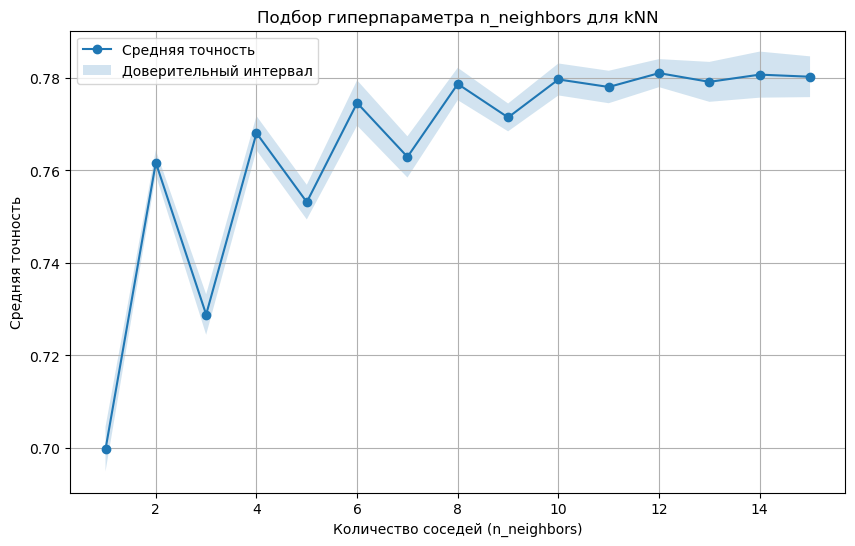

In [9]:
knn = KNeighborsClassifier() 
param_grid = {'n_neighbors': np.arange(1, 16)} 
cv = KFold(n_splits=5, shuffle=True, random_state=16) 

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

results = grid_search.cv_results_
mean_scores = results['mean_test_score']
std_scores = results['std_test_score']

plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], mean_scores, marker='o', label='Средняя точность')
plt.fill_between(param_grid['n_neighbors'], mean_scores - std_scores, mean_scores + std_scores, alpha=0.2, label='Доверительный интервал')

plt.title('Подбор гиперпараметра n_neighbors для kNN')
plt.xlabel('Количество соседей (n_neighbors)')
plt.ylabel('Средняя точность')
plt.legend()
plt.grid(True)
plt.show()

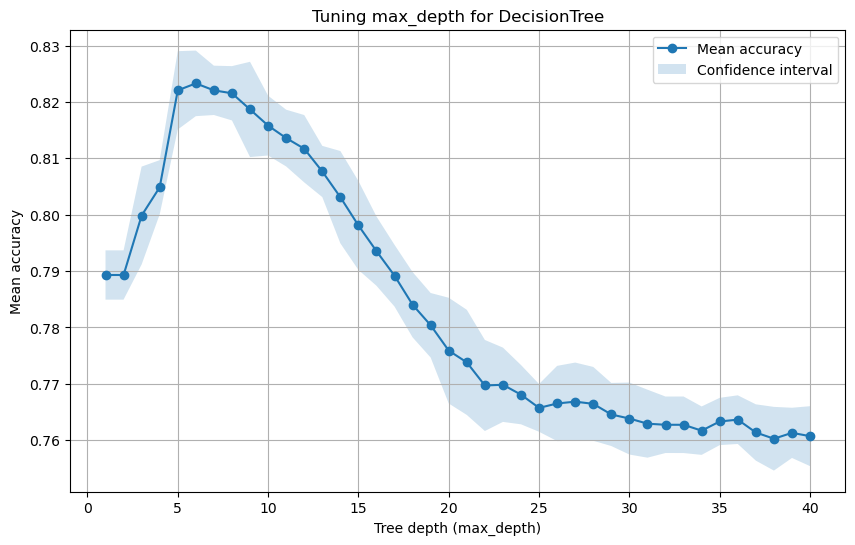

In [10]:
# create DecisionTree model
dt = DecisionTreeClassifier(random_state=16)

param_grid = {'max_depth': np.arange(1, 41)}  # I tried different values; beyond 40 accuracy doesn't seem to change
cv = KFold(n_splits=5, shuffle=True, random_state=16)

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# fetch GridSearchCV results
results = grid_search.cv_results_
mean_scores = results['mean_test_score']
std_scores = results['std_test_score']

plt.figure(figsize=(10, 6))
plt.plot(param_grid['max_depth'], mean_scores, marker='o', label='Mean accuracy')
plt.fill_between(param_grid['max_depth'], mean_scores - std_scores, mean_scores + std_scores, alpha=0.2, label='Confidence interval')

plt.title('Tuning max_depth for DecisionTree')
plt.xlabel('Tree depth (max_depth)')
plt.ylabel('Mean accuracy')
plt.legend()
plt.grid(True)
plt.show()

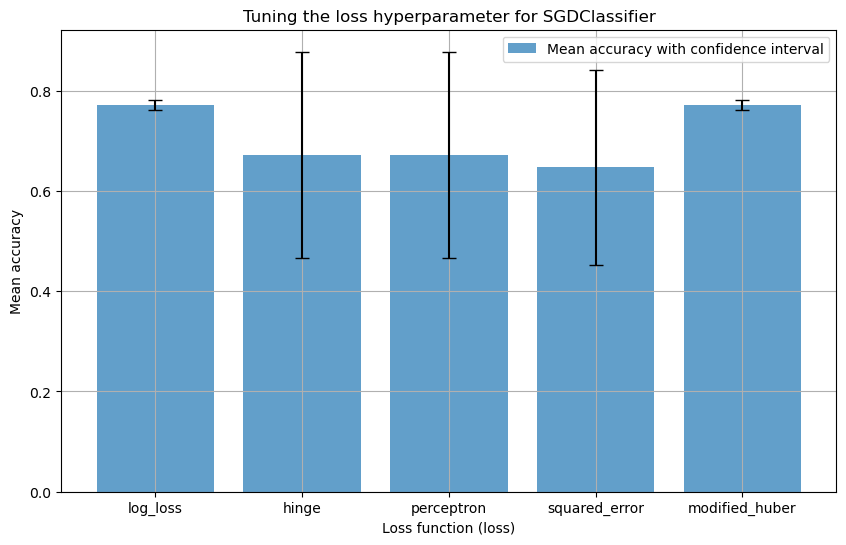

In [11]:
# create SGDClassifier model
sgd = SGDClassifier(random_state=16)

param_grid = {'loss': ['log_loss', 'hinge', 'perceptron', 'squared_error', 'modified_huber']}
cv = KFold(n_splits=5, shuffle=True, random_state=16)

grid_search = GridSearchCV(estimator=sgd, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# obtain GridSearchCV results
results = grid_search.cv_results_
mean_scores = results['mean_test_score']
std_scores = results['std_test_score']

plt.figure(figsize=(10, 6))
plt.bar(param_grid['loss'], mean_scores, yerr=std_scores, alpha=0.7, capsize=5,
        label='Mean accuracy with confidence interval')

plt.title('Tuning the loss hyperparameter for SGDClassifier')
plt.xlabel('Loss function (loss)')
plt.ylabel('Mean accuracy')
plt.legend()
plt.grid(True)
plt.show()

**kNN model**: When the number of neighbors is small, the model is overly sensitive to noise in the data, which leads to fluctuations in accuracy. After about 12 neighbors, accuracy stabilizes (increasing the number of neighbors no longer yields a significant improvement).

**DecisionTree model**: The optimal tree depth is around 5 (accuracy is maximal). As depth increases, accuracy starts to decline due to overfitting, and after a depth of 40 it levels off (trees that are too deep lose the ability to generalize and fit noise too closely).

**SGDClassifier model**: Maximum accuracy is achieved with the **log_loss** (equivalent to logistic regression) and **modified_huber** loss functions, indicating good behavior for classification tasks with probabilistic outputs.

Task 3 (0.5 points)
Also tune the number of trees (n_estimators) in RandomForest. In general, a Random Forest does not overfit as the number of trees increases, so its quality should not get worse when you add more trees.
Find a number of trees at which the cross-validated performance stabilizes.

Tip: You don’t need to train many separate forests from scratch. Train one forest with a large “max interesting” number of trees, then evaluate prefix subsets of its trees via the estimators_ attribute.

Below is a template that performs 5-fold CV, fits one big RF per fold, and evaluates prefixes of trees (e.g., 10, 20, …, 500) using ROC-AUC. You can switch the metric to accuracy if needed.

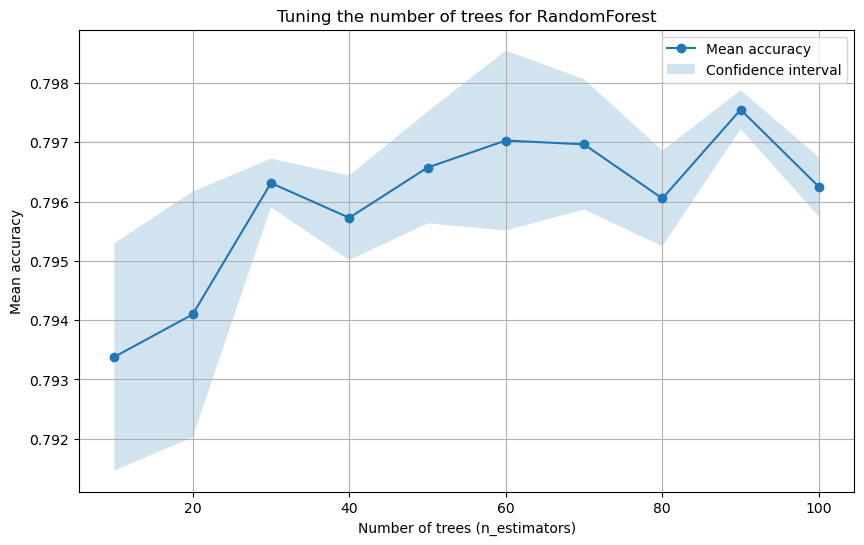

In [12]:
max_trees = 100
rf = RandomForestClassifier(n_estimators=max_trees, random_state=16, n_jobs=-1)
rf.fit(X, y)

n_estimators_range = np.arange(10, max_trees + 1, 10)

mean_scores = []
std_scores = []

for n_estimators in n_estimators_range:
    sub_rf = RandomForestClassifier(n_estimators=n_estimators, random_state=16, n_jobs=-1)
    scores = cross_val_score(sub_rf, X, y, cv=3, scoring='accuracy', n_jobs=-1)
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, mean_scores, marker='o', label='Mean accuracy')
plt.fill_between(
    n_estimators_range,
    np.array(mean_scores) - np.array(std_scores),
    np.array(mean_scores) + np.array(std_scores),
    alpha=0.2,
    label='Confidence interval'
)

plt.title('Tuning the number of trees for RandomForest')
plt.xlabel('Number of trees (n_estimators)')
plt.ylabel('Mean accuracy')
plt.legend()
plt.grid(True)
plt.show()


Task 4 (0.5 points)
Tune the number of trees (n_estimators) in GradientBoosting. The test error for boosting typically has a U-shaped curve: it decreases at first and then increases after some point.
Plot the error vs. number of trees and pick the n_estimators that corresponds to the minimum error.

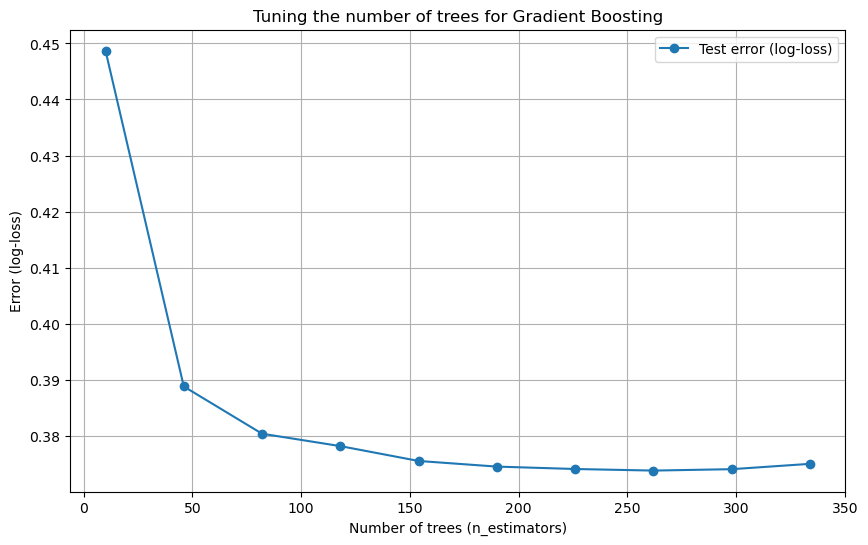

Optimal number of trees: 262


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

n_estimators_range = np.arange(10, 351, 36)  # tried many values to see a minimum on the plot without making the code run for ages
test_errors = []

# Train GradientBoostingClassifier and compute error
for n_estimators in n_estimators_range:
    gb = GradientBoostingClassifier(n_estimators=n_estimators, random_state=16)
    gb.fit(X_train, y_train)
    y_pred_proba = gb.predict_proba(X_test)
    test_errors.append(log_loss(y_test, y_pred_proba))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, test_errors, marker='o', label='Test error (log-loss)')
plt.title('Tuning the number of trees for Gradient Boosting')
plt.xlabel('Number of trees (n_estimators)')
plt.ylabel('Error (log-loss)')
plt.legend()
plt.grid(True)
plt.show()

optimal_n_estimators = n_estimators_range[np.argmin(test_errors)]
print(f'Optimal number of trees: {optimal_n_estimators}')


When training algorithms, it’s important to consider not only their performance but also how they interact with the data.
In this task, some of the algorithms used are sensitive to the scale of features.
To check whether this might have affected performance, let’s take a closer look at the feature distributions.

Task 5 (0.5 points)
Plot histograms for the features age, fnlwgt, and capital-gain.
After observing the plots, answer the following questions:

What is special about the data?

Which algorithms could this affect?

Can feature scaling influence how these algorithms perform?

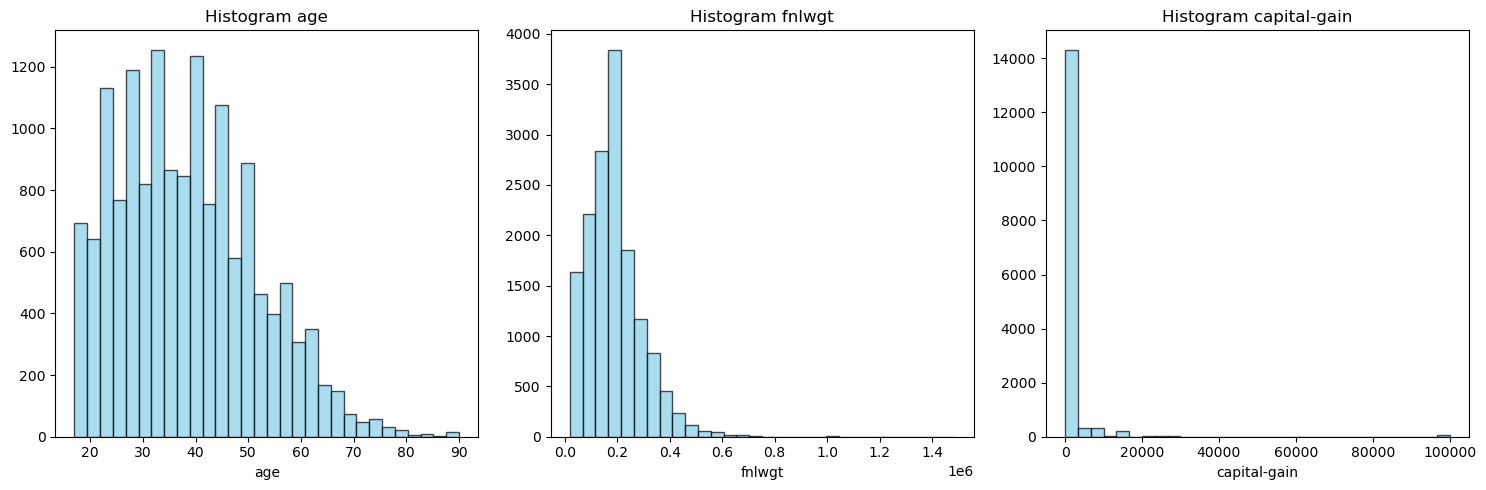

In [14]:
features = ['age', 'fnlwgt', 'capital-gain']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    plt.hist(new_df[feature], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

For **kNN** and **SGDClassifier**, feature scaling is **very important**, since these algorithms rely on **distance calculations** (in the case of kNN) or **gradient descent optimization** (in the case of SGDClassifier).

For **DecisionTree**, **RandomForest**, and **GradientBoosting**, scaling has **little to no effect**, because these models use **data-splitting methods** based on feature thresholds rather than distance or gradient magnitude — they are inherently **scale-invariant**.


Feature scaling can be performed, for example, using one of the following methods:

* ( x_{new} = \dfrac{x - \mu}{\sigma} ), where ( \mu, \sigma ) are the mean and standard deviation of the feature across the entire dataset (see the [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function).
* ( x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}} ), where ([x_{min}, x_{max}]) is the minimum interval of feature values.

Similar scaling schemes are implemented in the classes [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) and [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).

**Task 6 (1 point)**
Scale all numerical features using one of the mentioned methods and tune the optimal values of hyperparameters in the same way as in the previous section.

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(new_df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])
X_scaled_df = pd.DataFrame(X_scaled, columns=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'])

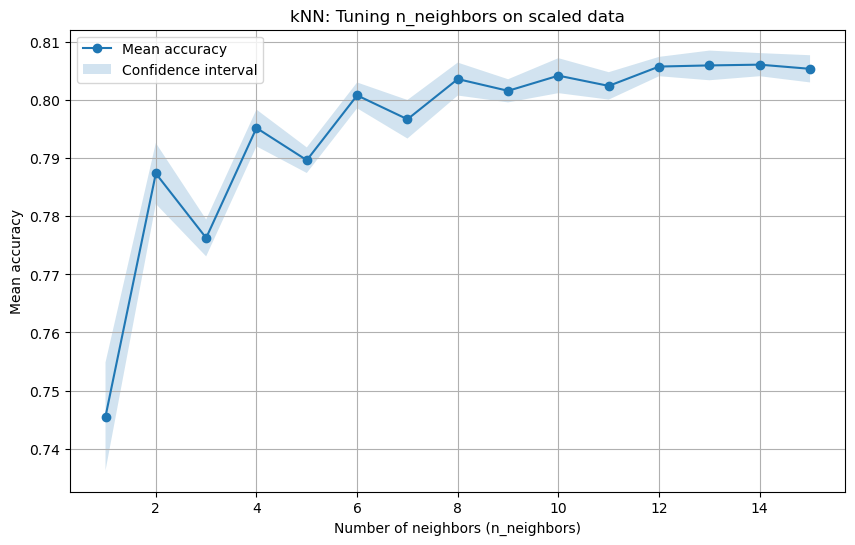

Optimal n_neighbors for kNN: 14


In [16]:
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': np.arange(1, 16)}

cv = KFold(n_splits=5, shuffle=True, random_state=16)

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_scaled, y)

results_knn = grid_search_knn.cv_results_
mean_scores_knn = results_knn['mean_test_score']
std_scores_knn = results_knn['std_test_score']

plt.figure(figsize=(10, 6))
plt.plot(param_grid_knn['n_neighbors'], mean_scores_knn, marker='o', label='Mean accuracy')
plt.fill_between(param_grid_knn['n_neighbors'], mean_scores_knn - std_scores_knn, mean_scores_knn + std_scores_knn,
                 alpha=0.2, label='Confidence interval')
plt.title('kNN: Tuning n_neighbors on scaled data')
plt.xlabel('Number of neighbors (n_neighbors)')
plt.ylabel('Mean accuracy')
plt.legend()
plt.grid(True)
plt.show()

optimal_knn = grid_search_knn.best_params_['n_neighbors']
print(f"Optimal n_neighbors for kNN: {optimal_knn}")

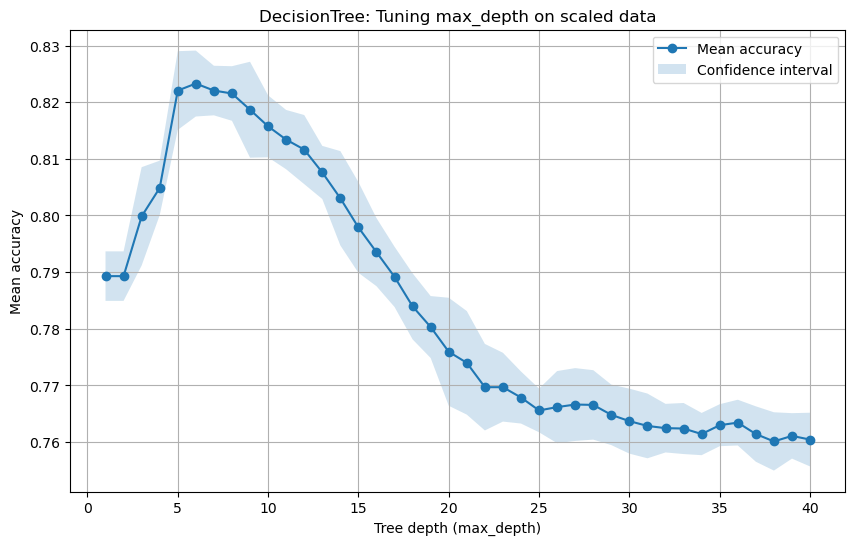

Optimal n_neighbors for DecisionTree: 6


In [17]:
dt = DecisionTreeClassifier(random_state=16)

param_grid = {'max_depth': np.arange(1, 41)}
cv = KFold(n_splits=5, shuffle=True, random_state=16)

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_scaled, y)

results = grid_search.cv_results_
mean_scores = results['mean_test_score']
std_scores = results['std_test_score']

plt.figure(figsize=(10, 6))
plt.plot(param_grid['max_depth'], mean_scores, marker='o', label='Mean accuracy')
plt.fill_between(param_grid['max_depth'], mean_scores - std_scores, mean_scores + std_scores, alpha=0.2, label='Confidence interval')

plt.title('DecisionTree: Tuning max_depth on scaled data')
plt.xlabel('Tree depth (max_depth)')
plt.ylabel('Mean accuracy')
plt.legend()
plt.grid(True)
plt.show()

optimal = grid_search.best_params_['max_depth']
print(f"Optimal n_neighbors for DecisionTree: {optimal}")

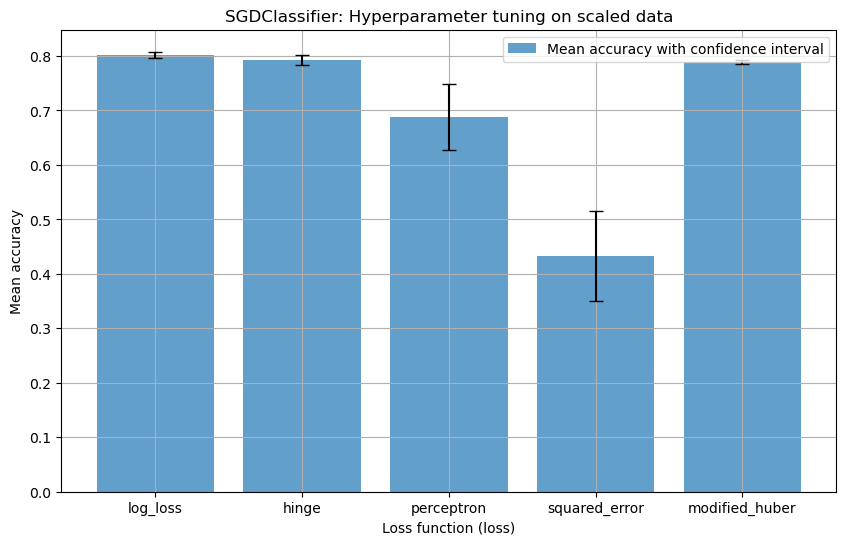

Optimal loss for SGDClassifier: log_loss


In [20]:
sgd = SGDClassifier(random_state=16)

param_grid = {'loss': ['log_loss', 'hinge', 'perceptron', 'squared_error', 'modified_huber']}
cv = KFold(n_splits=5, shuffle=True, random_state=16)

grid_search = GridSearchCV(estimator=sgd, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_scaled, y)

# Retrieve GridSearchCV results
results = grid_search.cv_results_
mean_scores = results['mean_test_score']
std_scores = results['std_test_score']

plt.figure(figsize=(10, 6))
plt.bar(param_grid['loss'], mean_scores, yerr=std_scores, alpha=0.7, capsize=5,
        label='Mean accuracy with confidence interval')

plt.title('SGDClassifier: Hyperparameter tuning on scaled data')
plt.xlabel('Loss function (loss)')
plt.ylabel('Mean accuracy')
plt.legend()
plt.grid(True)
plt.show()

optimal = grid_search.best_params_['loss']
print(f"Optimal loss for SGDClassifier: {optimal}")

**Did any algorithms’ quality change?**
Visually, the change in model quality is noticeable only for **SGDClassifier**, where hyperparameter tuning clearly affected accuracy. For **DecisionTree** and **RandomForest**, the quality remained more or less the same.

---

### **Task 7 (1.25 points)**

Now perform a grid search over several hyperparameters and find the **optimal combinations** (the best average quality) for each algorithm in this case:

* **kNN** — number of neighbors (*n_neighbors*) and distance metric (*metric*)
* **DecisionTree** — tree depth (*max_depth*) and splitting criterion (*criterion*)
* **RandomForest** — splitting criterion (*criterion*) and *max_features* (with the previously chosen number of trees fixed)
* **GradientBoosting** — splitting criterion (*criterion*) and *max_features* (with the previously chosen number of trees fixed)
* **SGDClassifier** — loss function (*loss*) and regularization type (*penalty*)

Note that this operation can be resource- and time-intensive.
Tips for optimizing grid search are given in the section **“Model Hyperparameter Tuning.”**

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
#KNN 
knn_param_grid = {
    'n_neighbors': np.arange(1, 21),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
knn_grid.fit(X, y)

#DecisionTree
dt_param_grid = {
    'max_depth': np.arange(1, 21),
    'criterion': ['gini', 'entropy']
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=16), dt_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
dt_grid.fit(X, y)

#RandomForest
rf_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_features': [1.0, 'sqrt', 'log2']
}

rf_grid = GridSearchCV(
    RandomForestClassifier(n_estimators=100, random_state=16),
    rf_param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)
rf_grid.fit(X, y)

#GradientBoosting 
gb_param_grid = {
    'criterion': ['friedman_mse', 'mse', 'mae'],
    'max_features': [1.0, 'sqrt', 'log2']
}
gb_grid = GridSearchCV(GradientBoostingClassifier(n_estimators=100, random_state=16), gb_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
gb_grid.fit(X, y)

#SGDClassifier 
sgd_param_grid = {
    'loss': ['hinge', 'log_loss', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet']
}
sgd_grid = GridSearchCV(SGDClassifier(random_state=16), sgd_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
sgd_grid.fit(X, y)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=16), n_jobs=-1,
             param_grid={'loss': ['hinge', 'log_loss', 'perceptron'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [23]:
print("KNN:")
print(f"Best parameters: {knn_grid.best_params_}")
print(f"Best score: {knn_grid.best_score_:.4f}\n")

print("DecisionTree:")
print(f"Best parameters: {dt_grid.best_params_}")
print(f"Best score: {dt_grid.best_score_:.4f}\n")

print("RandomForest:")
print(f"Best parameters: {rf_grid.best_params_}")
print(f"Best score: {rf_grid.best_score_:.4f}\n")

print("GradientBoosting:")
print(f"Best parameters: {gb_grid.best_params_}")
print(f"Best score: {gb_grid.best_score_:.4f}\n")

print("SGDClassifier:")
print(f"Best parameters: {sgd_grid.best_params_}")
print(f"Best score: {sgd_grid.best_score_:.4f}\n")

KNN:
Best parameters: {'metric': 'manhattan', 'n_neighbors': 12}
Best score: 0.7837

DecisionTree:
Best parameters: {'criterion': 'gini', 'max_depth': 5}
Best score: 0.8209

RandomForest:
Best parameters: {'criterion': 'entropy', 'max_features': 1.0}
Best score: 0.8009

GradientBoosting:
Best parameters: {'criterion': 'friedman_mse', 'max_features': 1.0}
Best score: 0.8319

SGDClassifier:
Best parameters: {'loss': 'hinge', 'penalty': 'l1'}
Best score: 0.7765



Which algorithm has the best quality?

*The best quality is achieved by the **GradientBoosting** algorithm with a result of **0.8319.***

---

**Task 8 (0.5 points)**
Compare the algorithms in terms of **training time**.
Which algorithm takes the **longest to train**, and why do you think that is?


In [25]:
import time

models = {
    "KNN": KNeighborsClassifier(metric='manhattan', n_neighbors=12),
    "DecisionTree": DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=16),
    "RandomForest": RandomForestClassifier(criterion='entropy', max_features=1.0, n_estimators=100, random_state=16),
    "GradientBoosting": GradientBoostingClassifier(criterion='friedman_mse', max_features=1.0, n_estimators=100, random_state=16),
    "SGDClassifier": SGDClassifier(loss='hinge', penalty='l1', random_state=16)
}

training_times = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X, y) 
    end_time = time.time()
    training_times[name] = end_time - start_time


for name, duration in training_times.items():
    print(f"{name}: {duration:.4f} seconds")

KNN: 0.0080 seconds
DecisionTree: 0.0194 seconds
RandomForest: 2.4226 seconds
GradientBoosting: 0.7651 seconds
SGDClassifier: 0.1363 seconds


The slowest algorithm is **RandomForest (2.4 seconds)**.
This is because it trains **100 decision trees**, each built using **bootstrap sampling** and **feature selection at every node** — a process that is computationally intensive and much slower compared to the other methods.

## Adding Categorical Features to the Models

So far, we haven’t used the dataset’s non-numeric (categorical) features. Let’s check whether that was the right choice and whether model quality improves after adding these features.

**Task 9 (0.5 points)**
Transform all categorical features using **one-hot encoding** (for example, with [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), [`pandas.get_dummies`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html), or [`DictVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) from scikit-learn).

In [26]:
new_df_2 = df.select_dtypes(include=['object'])
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
df_encoded = pd.get_dummies(new_df_2, columns=categorical_columns, drop_first=True)
df_encoded = df_encoded.replace({True: 1, False: 0})
df_encoded.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


**Task 10 (0.5 points)**
Add the **encoded categorical features** to the **scaled numerical features**, and train the algorithms using the **best hyperparameters** found in the previous step.

Check whether adding the new features has **improved the model quality**.
Measure performance as before using **5-Fold Cross-Validation**.

To do this, you can conveniently use the [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function.


In [29]:
df_final = pd.concat([X_scaled_df, df_encoded], axis=1, join='inner') 
df_final.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,-0.342919,0.900258,-0.450788,-0.065600,-0.21874,1.588223,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,0.114760,0.010683,-0.059086,-0.150439,-0.21874,-0.074178,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
2,-0.190359,-0.106280,1.116020,-0.150439,-0.21874,-0.074178,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,-1.258276,-0.041382,-0.059086,-0.150439,-0.21874,-0.905379,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.648719,-0.371197,1.116020,1.995391,-0.21874,-0.074178,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1


## Model Blending

In the previous sections, we obtained several strong models that differ significantly in nature (for example, *k-Nearest Neighbors* and *Random Forest*).
In practice, it is often possible to **improve prediction quality** by **blending** such diverse models. Let’s check whether this actually increases performance.

Select the two models from the previous steps that achieved the **highest cross-validation scores** (denote them as ( clf_1 ) and ( clf_2 )).
Next, construct a new classifier whose prediction for an instance ( x ) is defined as:

[
result(x) = clf_1(x) \cdot \alpha + clf_2(x) \cdot (1 - \alpha)
]

where ( \alpha ) is a **hyperparameter** of the new blended classifier.

---

**Task 12 (1 point)**
Perform a **grid search** over ( \alpha ) values ranging from **0 to 1** using **5-Fold Cross-Validation**, and plot the model quality as a function of ( \alpha ) (similar to the graph from the *“Training Classifiers and Evaluating Quality”* section).

Did this blending approach result in a **quality improvement** compared to the individual models?


In [30]:
from sklearn.model_selection import StratifiedKFold

clf_1 = RandomForestClassifier(random_state=16, n_estimators=100)
clf_2 = KNeighborsClassifier(n_neighbors=5)  

X_train, X_test, y_train, y_test = train_test_split(df_final, y, test_size=0.2, random_state=16)

clf_1.fit(X_train, y_train)
clf_2.fit(X_train, y_train)

alphas = np.linspace(0, 1, 21)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = []

for alpha in alphas:
    blended_predictions = []
    
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        clf_1.fit(X_train_fold, y_train_fold)
        clf_2.fit(X_train_fold, y_train_fold)

        proba_1 = clf_1.predict_proba(X_val_fold)
        proba_2 = clf_2.predict_proba(X_val_fold)
        
        blended_proba = alpha * proba_1 + (1 - alpha) * proba_2
        blended_predictions = np.argmax(blended_proba, axis=1)
        
        score = accuracy_score(y_val_fold, blended_predictions)
        scores.append(score)

mean_scores = [np.mean(scores[i * cv.get_n_splits():(i + 1) * cv.get_n_splits()]) for i in range(len(alphas))]

plt.figure(figsize=(10, 6))
plt.plot(alphas, mean_scores, marker='o')
plt.xlabel("$\\alpha$", fontsize=12)
plt.ylabel("Mean Accuracy", fontsize=12)
plt.grid(True)
plt.show()

best_alpha = alphas[np.argmax(mean_scores)]
best_score = max(mean_scores)
print(f"The best alpha: {best_alpha:.2f}, Mean Accuracy: {best_score:.4f}")

ValueError: Found input variables with inconsistent numbers of samples: [14458, 15347]

## Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей хотелось бы сравнить их между собой. Для этого можно построить "ящик с усами" (диаграму размаха). Для этого можно воспользоваться библиотекой [matplotlib](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html) или [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

**Задание 13 (1 балл)** Для каждого типа классификатора (kNN, DecisionTree, RandomForest, SGD classifier), а так же смешанной модели выберите тот, которых давал наилучшее качество на кросс-валидации (с учетом подобранных гиперпараметров) и постройте диаграмму размаха (все классификаторы должны быть изображены на одном графике).

Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

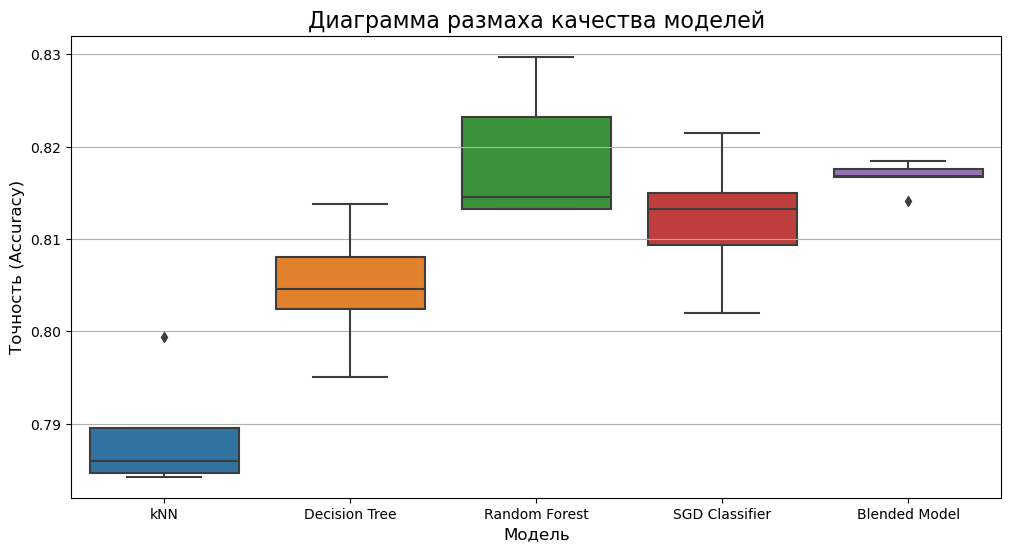

In [59]:
models = {
    "kNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "SGD Classifier": SGDClassifier(max_iter=1000, random_state=42),
    "Blended Model": None  #добавим позже
}

#вот, добавляем
alphas = np.linspace(0, 1, 21)
best_alpha = 0.75 
clf_1 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=16)
clf_2 = KNeighborsClassifier(n_neighbors=5)

def blended_model_predict_proba(X, alpha, clf_1, clf_2):
    proba_1 = clf_1.predict_proba(X)
    proba_2 = clf_2.predict_proba(X)
    return alpha * proba_1 + (1 - alpha) * proba_2

results = []

for name, model in models.items():
    if name == "Blended Model":
        scores = []
        for train_idx, val_idx in StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_train, y_train):
            X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
            
            clf_1.fit(X_train_fold, y_train_fold)
            clf_2.fit(X_train_fold, y_train_fold)
            
            blended_proba = blended_model_predict_proba(X_val_fold, best_alpha, clf_1, clf_2)
            blended_pred = np.argmax(blended_proba, axis=1)
            
            scores.append(accuracy_score(y_val_fold, blended_pred))
        results.append(pd.DataFrame({"Model": name, "Accuracy": scores}))
    else:
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
        results.append(pd.DataFrame({"Model": name, "Accuracy": scores}))

results_df = pd.concat(results)

plt.figure(figsize=(12, 6))
sns.boxplot(x="Model", y="Accuracy", data=results_df)
plt.title("Диаграмма размаха качества моделей", fontsize=16)
plt.xlabel("Модель", fontsize=12)
plt.ylabel("Точность (Accuracy)", fontsize=12)
plt.grid(axis="y")
plt.show()

Спасибо большое за проверку всех работ! Я многое не понимала под конец и прямо сильно пользовалась ChatGPT( Но я очень хочу разобраться во всем, так что к домашке еще вернусь, просто после декабря и уже чисто для профилактики)